In [ ]:
!nvidia-smi

Tue May 13 12:26:30 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.06             Driver Version: 535.183.06   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100 80GB PCIe          Off | 00000000:CA:00.0 Off |                    0 |
| N/A   63C    P0             278W / 300W |  67745MiB / 81920MiB |     99%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords, words
from nltk.stem import PorterStemmer
from textblob import TextBlob
from nltk.tokenize import word_tokenize
import ast

In [ ]:
pd.set_option('mode.chained_assignment', None)
df=pd.read_csv("/home/p24cs007/Dataset/preprocessed_text2.csv")
df

,Unnamed: 0,Text,Cleaned_Text,lemmatized_text
0,0,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,"['buy', 'several', 'vitality', 'can', 'dog', '..."
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...,"['product', 'arrive', 'label', 'jumbo', 'salt'..."
2,2,This is a confection that has been around a fe...,confection around centuries light pillowy citr...,"['confection', 'around', 'century', 'light', '..."
3,3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,"['look', 'secret', 'ingredient', 'robitussin',..."
4,4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,"['great', 'taffy', 'great', 'price', 'wide', '..."
...,...,...,...,...
99995,99995,I just love it and will buy another box when I...,love buy another box im done last one,"['love', 'buy', 'another', 'box', 'I', 'm', 'd..."
99996,99996,My late father in law used to have a rating sy...,late father law used rating system meals parti...,"['late', 'father', 'law', 'use', 'rating', 'sy..."
99997,99997,This is my favorite brand of Korean ramen. It ...,favorite brand korean ramen spicy used eating ...,"['favorite', 'brand', 'korean', 'raman', 'spic..."
99998,99998,"I do like these noodles although, to say they ...",like noodles although say spicy somewhat under...,"['like', 'noodle', 'although', 'say', 'spicy',..."


In [ ]:
df=df[['lemmatized_text']]
df

,lemmatized_text
0,"['buy', 'several', 'vitality', 'can', 'dog', '..."
1,"['product', 'arrive', 'label', 'jumbo', 'salt'..."
2,"['confection', 'around', 'century', 'light', '..."
3,"['look', 'secret', 'ingredient', 'robitussin',..."
4,"['great', 'taffy', 'great', 'price', 'wide', '..."
...,...
99995,"['love', 'buy', 'another', 'box', 'I', 'm', 'd..."
99996,"['late', 'father', 'law', 'use', 'rating', 'sy..."
99997,"['favorite', 'brand', 'korean', 'raman', 'spic..."
99998,"['like', 'noodle', 'although', 'say', 'spicy',..."


In [ ]:
df['lemmatized_text'] = df['lemmatized_text'].apply(ast.literal_eval)
df

,lemmatized_text
0,"[buy, several, vitality, can, dog, food, produ..."
1,"[product, arrive, label, jumbo, salt, peanutst..."
2,"[confection, around, century, light, pillowy, ..."
3,"[look, secret, ingredient, robitussin, believe..."
4,"[great, taffy, great, price, wide, assortment,..."
...,...
99995,"[love, buy, another, box, I, m, do, last, one]"
99996,"[late, father, law, use, rating, system, meal,..."
99997,"[favorite, brand, korean, raman, spicy, use, e..."
99998,"[like, noodle, although, say, spicy, somewhat,..."


In [ ]:
from gensim.corpora import Dictionary


#creating a dictionary
dictionary = Dictionary(df['lemmatized_text'])

# Filter extremes to remove very rare and very common words
dictionary.filter_extremes(no_below=5, no_above=0.7)

# Create a bag-of-words corpus
corpus = [dictionary.doc2bow(tokens) for tokens in df['lemmatized_text']]

  1%|          | 1/99 [06:06<9:58:56, 366.70s/it]

Topics: 100, Coherence Score: 0.3568


  2%|▏         | 2/99 [12:49<10:27:16, 388.01s/it]

Topics: 99, Coherence Score: 0.3580


  3%|▎         | 3/99 [19:50<10:44:30, 402.81s/it]

Topics: 98, Coherence Score: 0.3549


  4%|▍         | 4/99 [26:44<10:45:19, 407.57s/it]

Topics: 97, Coherence Score: 0.3570


  5%|▌         | 5/99 [33:38<10:42:10, 409.90s/it]

Topics: 96, Coherence Score: 0.3596


  6%|▌         | 6/99 [40:34<10:38:11, 411.74s/it]

Topics: 95, Coherence Score: 0.3624


  7%|▋         | 7/99 [47:56<10:46:43, 421.78s/it]

Topics: 94, Coherence Score: 0.3607


  8%|▊         | 8/99 [57:34<11:55:15, 471.60s/it]

Topics: 93, Coherence Score: 0.3558


  9%|▉         | 9/99 [1:07:12<12:36:50, 504.56s/it]

Topics: 92, Coherence Score: 0.3628


 10%|█         | 10/99 [1:16:57<13:05:37, 529.63s/it]

Topics: 91, Coherence Score: 0.3586


 11%|█         | 11/99 [1:27:00<13:29:25, 551.88s/it]

Topics: 90, Coherence Score: 0.3446


 12%|█▏        | 12/99 [1:36:34<13:30:00, 558.63s/it]

Topics: 89, Coherence Score: 0.3632


 13%|█▎        | 13/99 [1:46:14<13:29:58, 565.10s/it]

Topics: 88, Coherence Score: 0.3511


 14%|█▍        | 14/99 [1:56:08<13:32:51, 573.79s/it]

Topics: 87, Coherence Score: 0.3569


 15%|█▌        | 15/99 [2:05:53<13:28:12, 577.29s/it]

Topics: 86, Coherence Score: 0.3585


 16%|█▌        | 16/99 [2:15:38<13:21:59, 579.75s/it]

Topics: 85, Coherence Score: 0.3631


 17%|█▋        | 17/99 [2:25:28<13:16:17, 582.65s/it]

Topics: 84, Coherence Score: 0.3612


 18%|█▊        | 18/99 [2:34:59<13:02:06, 579.34s/it]

Topics: 83, Coherence Score: 0.3662


 19%|█▉        | 19/99 [2:44:16<12:43:25, 572.57s/it]

Topics: 82, Coherence Score: 0.3540


 20%|██        | 20/99 [2:53:24<12:24:00, 565.07s/it]

Topics: 81, Coherence Score: 0.3604


 21%|██        | 21/99 [3:02:39<12:10:44, 562.11s/it]

Topics: 80, Coherence Score: 0.3634


 22%|██▏       | 22/99 [3:11:15<11:43:40, 548.32s/it]

Topics: 79, Coherence Score: 0.3664


 23%|██▎       | 23/99 [3:19:53<11:22:51, 539.10s/it]

Topics: 78, Coherence Score: 0.3722


 24%|██▍       | 24/99 [3:28:30<11:05:50, 532.67s/it]

Topics: 77, Coherence Score: 0.3783


 25%|██▌       | 25/99 [3:36:48<10:43:59, 522.16s/it]

Topics: 76, Coherence Score: 0.3790


 26%|██▋       | 26/99 [3:44:32<10:13:55, 504.60s/it]

Topics: 75, Coherence Score: 0.3655


 27%|██▋       | 27/99 [3:51:17<9:29:54, 474.93s/it] 

Topics: 74, Coherence Score: 0.3597


 28%|██▊       | 28/99 [3:57:43<8:50:10, 448.04s/it]

Topics: 73, Coherence Score: 0.3707


 29%|██▉       | 29/99 [4:03:50<8:14:35, 423.94s/it]

Topics: 72, Coherence Score: 0.3684


 30%|███       | 30/99 [4:09:28<7:37:41, 397.99s/it]

Topics: 71, Coherence Score: 0.3724


 31%|███▏      | 31/99 [4:14:57<7:07:39, 377.35s/it]

Topics: 70, Coherence Score: 0.3627


 32%|███▏      | 32/99 [4:20:14<6:41:17, 359.36s/it]

Topics: 69, Coherence Score: 0.3888


 33%|███▎      | 33/99 [4:25:16<6:16:14, 342.04s/it]

Topics: 68, Coherence Score: 0.3792


 34%|███▍      | 34/99 [4:30:17<5:57:16, 329.79s/it]

Topics: 67, Coherence Score: 0.3704


 35%|███▌      | 35/99 [4:35:08<5:39:06, 317.92s/it]

Topics: 66, Coherence Score: 0.3789


 36%|███▋      | 36/99 [4:40:07<5:27:58, 312.36s/it]

Topics: 65, Coherence Score: 0.3758


 37%|███▋      | 37/99 [4:44:57<5:15:44, 305.55s/it]

Topics: 64, Coherence Score: 0.3872


 38%|███▊      | 38/99 [4:49:45<5:05:16, 300.27s/it]

Topics: 63, Coherence Score: 0.3783


 39%|███▉      | 39/99 [4:54:32<4:56:24, 296.41s/it]

Topics: 62, Coherence Score: 0.3796


 40%|████      | 40/99 [4:59:20<4:49:08, 294.04s/it]

Topics: 61, Coherence Score: 0.3763


 41%|████▏     | 41/99 [5:04:04<4:41:09, 290.86s/it]

Topics: 60, Coherence Score: 0.3797


 42%|████▏     | 42/99 [5:08:41<4:32:16, 286.61s/it]

Topics: 59, Coherence Score: 0.4028


 43%|████▎     | 43/99 [5:13:20<4:25:27, 284.42s/it]

Topics: 58, Coherence Score: 0.4083


 44%|████▍     | 44/99 [5:17:56<4:18:23, 281.88s/it]

Topics: 57, Coherence Score: 0.4014


 45%|████▌     | 45/99 [5:22:32<4:12:01, 280.03s/it]

Topics: 56, Coherence Score: 0.3994


 46%|████▋     | 46/99 [5:27:06<4:05:50, 278.30s/it]

Topics: 55, Coherence Score: 0.4044


 47%|████▋     | 47/99 [5:31:47<4:02:04, 279.31s/it]

Topics: 54, Coherence Score: 0.4012


 48%|████▊     | 48/99 [5:36:23<3:56:20, 278.06s/it]

Topics: 53, Coherence Score: 0.4043


 49%|████▉     | 49/99 [5:40:56<3:50:37, 276.74s/it]

Topics: 52, Coherence Score: 0.3978


 51%|█████     | 50/99 [5:45:38<3:47:05, 278.08s/it]

Topics: 51, Coherence Score: 0.3993


 52%|█████▏    | 51/99 [5:50:19<3:43:10, 278.97s/it]

Topics: 50, Coherence Score: 0.4044


 53%|█████▎    | 52/99 [5:54:50<3:36:51, 276.85s/it]

Topics: 49, Coherence Score: 0.3961


 54%|█████▎    | 53/99 [5:59:36<3:34:14, 279.44s/it]

Topics: 48, Coherence Score: 0.4194


 55%|█████▍    | 54/99 [6:04:46<3:36:33, 288.74s/it]

Topics: 47, Coherence Score: 0.4103


 56%|█████▌    | 55/99 [6:10:20<3:41:32, 302.11s/it]

Topics: 46, Coherence Score: 0.4266


 57%|█████▋    | 56/99 [6:15:54<3:43:31, 311.89s/it]

Topics: 45, Coherence Score: 0.4199


 58%|█████▊    | 57/99 [6:21:16<3:40:25, 314.89s/it]

Topics: 44, Coherence Score: 0.4390


 59%|█████▊    | 58/99 [6:26:37<3:36:23, 316.67s/it]

Topics: 43, Coherence Score: 0.3953


 60%|█████▉    | 59/99 [6:32:03<3:32:54, 319.36s/it]

Topics: 42, Coherence Score: 0.4221


 61%|██████    | 60/99 [6:37:18<3:26:51, 318.24s/it]

Topics: 41, Coherence Score: 0.4261


 62%|██████▏   | 61/99 [6:42:43<3:22:45, 320.13s/it]

Topics: 40, Coherence Score: 0.4327


 63%|██████▎   | 62/99 [6:48:01<3:17:02, 319.54s/it]

Topics: 39, Coherence Score: 0.4307


 64%|██████▎   | 63/99 [6:53:11<3:10:03, 316.75s/it]

Topics: 38, Coherence Score: 0.4446


 65%|██████▍   | 64/99 [6:58:25<3:04:14, 315.85s/it]

Topics: 37, Coherence Score: 0.4437


 66%|██████▌   | 65/99 [7:03:22<2:55:45, 310.16s/it]

Topics: 36, Coherence Score: 0.4481


 67%|██████▋   | 66/99 [7:07:34<2:41:04, 292.85s/it]

Topics: 35, Coherence Score: 0.4520


 68%|██████▊   | 67/99 [7:11:31<2:27:09, 275.94s/it]

Topics: 34, Coherence Score: 0.4507


 69%|██████▊   | 68/99 [7:15:19<2:15:07, 261.53s/it]

Topics: 33, Coherence Score: 0.4452


 70%|██████▉   | 69/99 [7:19:06<2:05:37, 251.25s/it]

Topics: 32, Coherence Score: 0.4489


 71%|███████   | 70/99 [7:22:57<1:58:32, 245.26s/it]

Topics: 31, Coherence Score: 0.4340


 72%|███████▏  | 71/99 [7:26:46<1:52:09, 240.36s/it]

Topics: 30, Coherence Score: 0.4380


 73%|███████▎  | 72/99 [7:30:34<1:46:28, 236.59s/it]

Topics: 29, Coherence Score: 0.4540


 74%|███████▎  | 73/99 [7:34:23<1:41:29, 234.19s/it]

Topics: 28, Coherence Score: 0.4609


 75%|███████▍  | 74/99 [7:38:08<1:36:30, 231.60s/it]

Topics: 27, Coherence Score: 0.4618


 76%|███████▌  | 75/99 [7:41:55<1:32:06, 230.27s/it]

Topics: 26, Coherence Score: 0.4652


 77%|███████▋  | 76/99 [7:45:40<1:27:35, 228.48s/it]

Topics: 25, Coherence Score: 0.4575


 78%|███████▊  | 77/99 [7:49:21<1:23:01, 226.44s/it]

Topics: 24, Coherence Score: 0.4673


 79%|███████▉  | 78/99 [7:53:07<1:19:11, 226.27s/it]

Topics: 23, Coherence Score: 0.5031


 80%|███████▉  | 79/99 [7:56:57<1:15:46, 227.33s/it]

Topics: 22, Coherence Score: 0.4711


 81%|████████  | 80/99 [8:00:36<1:11:09, 224.72s/it]

Topics: 21, Coherence Score: 0.4727


 82%|████████▏ | 81/99 [8:04:25<1:07:47, 225.96s/it]

Topics: 20, Coherence Score: 0.4852


 83%|████████▎ | 82/99 [8:08:08<1:03:47, 225.16s/it]

Topics: 19, Coherence Score: 0.4783


 84%|████████▍ | 83/99 [8:11:48<59:37, 223.56s/it]  

Topics: 18, Coherence Score: 0.4712


 85%|████████▍ | 84/99 [8:15:26<55:27, 221.85s/it]

Topics: 17, Coherence Score: 0.4791


 86%|████████▌ | 85/99 [8:19:02<51:21, 220.14s/it]

Topics: 16, Coherence Score: 0.4650


 87%|████████▋ | 86/99 [8:22:41<47:39, 219.96s/it]

Topics: 15, Coherence Score: 0.4807


 88%|████████▊ | 87/99 [8:26:16<43:41, 218.43s/it]

Topics: 14, Coherence Score: 0.4745


 89%|████████▉ | 88/99 [8:29:53<39:56, 217.84s/it]

Topics: 13, Coherence Score: 0.4678


 90%|████████▉ | 89/99 [8:33:38<36:41, 220.18s/it]

Topics: 12, Coherence Score: 0.4858


 91%|█████████ | 90/99 [8:37:19<33:03, 220.38s/it]

Topics: 11, Coherence Score: 0.4626


 92%|█████████▏| 91/99 [8:40:53<29:07, 218.47s/it]

Topics: 10, Coherence Score: 0.4691


 93%|█████████▎| 92/99 [8:44:32<25:31, 218.73s/it]

Topics: 9, Coherence Score: 0.4659


 94%|█████████▍| 93/99 [8:48:07<21:44, 217.44s/it]

Topics: 8, Coherence Score: 0.4673


 95%|█████████▍| 94/99 [8:51:39<17:59, 215.85s/it]

Topics: 7, Coherence Score: 0.4586


 96%|█████████▌| 95/99 [8:55:11<14:18, 214.66s/it]

Topics: 6, Coherence Score: 0.4435


 97%|█████████▋| 96/99 [8:58:50<10:48, 216.03s/it]

Topics: 5, Coherence Score: 0.4326


 98%|█████████▊| 97/99 [9:02:41<07:20, 220.48s/it]

Topics: 4, Coherence Score: 0.4033


 99%|█████████▉| 98/99 [9:06:38<03:45, 225.39s/it]

Topics: 3, Coherence Score: 0.3925


100%|██████████| 99/99 [9:10:40<00:00, 333.74s/it]

Topics: 2, Coherence Score: 0.3633
optimal number of topics is 23


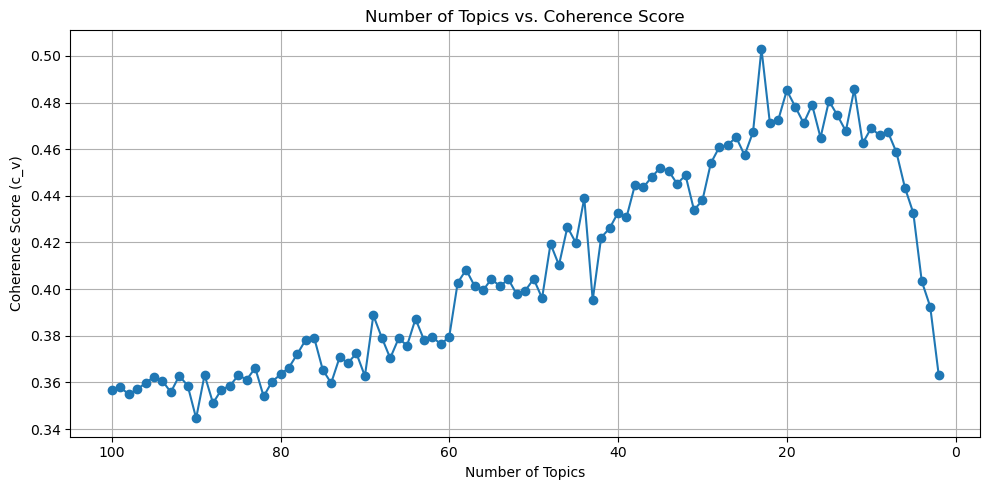

In [ ]:
import matplotlib.pyplot as plt
from gensim.models import LdaModel, CoherenceModel
from tqdm import tqdm

def run_lda_coherence(tokenized_docs, dictionary, corpus, start=100, stop=2, step=-1):
    best_score = -1
    best_model = None
    best_n = None

    topic_counts = []
    coherence_scores = []

    for n_topics in tqdm(range(start, stop - 1, step)):
        lda = LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=n_topics,
            passes=10,
            random_state=42,
            eval_every=None
        )

        coherence_model = CoherenceModel(
            model=lda,
            texts=tokenized_docs,
            dictionary=dictionary,
            coherence='c_v'
        )

        score = coherence_model.get_coherence()

        print(f"Topics: {n_topics}, Coherence Score: {score:.4f}")

        topic_counts.append(n_topics)
        coherence_scores.append(score)

        if score > best_score:
            best_score = score
            best_model = lda
            best_n = n_topics



    return best_model, best_n,topic_counts,coherence_scores


best_model,best_n,topic_counts,coherence_scores=run_lda_coherence(df["lemmatized_text"], dictionary, corpus, start=100, stop=2, step=-1)


best_model.save("BTech_LDA_model.gensim")
print(f"optimal number of topics is {best_n}")

# Plot the coherence scores
plt.figure(figsize=(10, 5))
plt.plot(topic_counts, coherence_scores, marker='o')
plt.title('Number of Topics vs. Coherence Score')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (c_v)')
plt.gca().invert_xaxis()  # optional: for decreasing order
plt.grid(True)
plt.tight_layout()
plt.show()

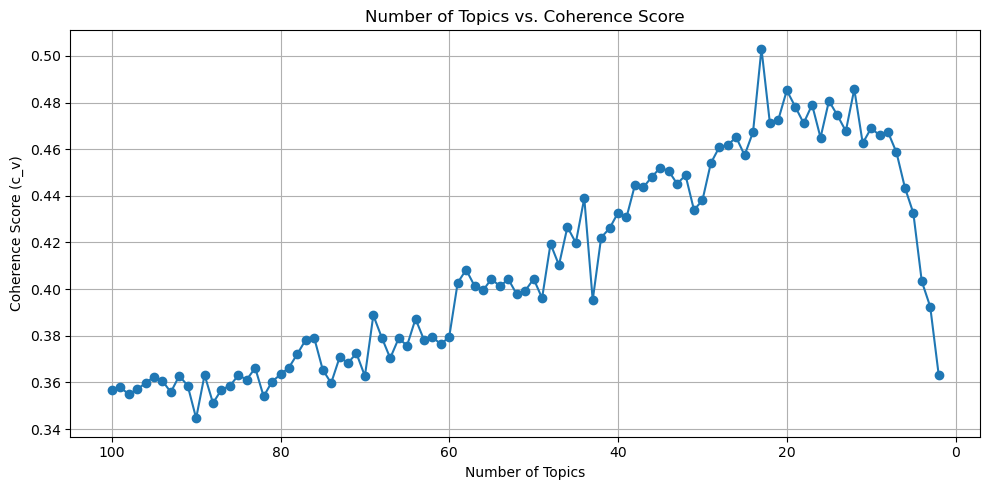

In [ ]:
# Plot the coherence scores
plt.figure(figsize=(10, 5))
plt.plot(topic_counts, coherence_scores, marker='o')
plt.title('Number of Topics vs. Coherence Score')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (c_v)')
plt.gca().invert_xaxis()  # optional: for decreasing order
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 654.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 re

In [ ]:
!pip install numpy==1.24.4 scipy==1.10.1 gensim==4.3.1 --upgrade --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninstalled smart-open-7.1.0
  Attempting uninstall: scipy
    Found existing installa

In [ ]:
from gensim.models import LdaModel

# Load the previously saved best model from Drive
best_model = LdaModel.load("/content/drive/MyDrive/LDA_PROJECT_FOLDER/BTech_LDA_model.gensim")

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# Step 1: Automatically generate topic names using top 3 keywords per topic
def generate_topic_labels(lda_model, topn=3):
    topic_names = {}
    for topic_id in range(lda_model.num_topics):
        top_words = [word for word, _ in lda_model.show_topic(topic_id, topn=topn)]
        label = " ".join(top_words)
        topic_names[topic_id] = label
    return topic_names

# Step 2: Generate the labels from best_model
topic_names = generate_topic_labels(best_model, topn=3)

# Step 3: Map topic numbers to names
df['Topic_Name'] = df['Dominant_Topic'].map(topic_names)

NameError: name 'BTech_LDA_model' is not defined